# Fashion MNIST Dataset Convolutional Neural Network

In [6]:
import numpy as np
import torch
import torchvision
import torchvision.datasets as datasets
import matplotlib.pyplot as plt

## Loading the dataset to be usable in pytorch

In [19]:
mnist_datasets_train = datasets.FashionMNIST(root='./data',train=True,download=True,transform=torchvision.transforms.ToTensor())

mnist_datasets_test = datasets.FashionMNIST(root='./data',train=False,download=True,transform=torchvision.transforms.ToTensor())

## Creating the training dataset

In [8]:
from torch.utils.data import DataLoader
batch_size = 256

train_iter = DataLoader(mnist_datasets_train,batch_size,shuffle=True)

In [9]:
X,y = next(iter(train_iter))

## Creating the test dataset

In [ ]:
test_iter = DataLoader(mnist_datasets_test,batch_size,shuffle=True)

In [ ]:
X_test,y_test = next(iter(test_iter))

## Visualising and understanding the dimensionality of the input images

In [18]:
print(f'The dimensions of each input image is {X.size()} The number of input channels is {X.size()[1]}')
print(f'The output labels are as follows {y}')

The dimensions of each input image is torch.Size([256, 1, 28, 28]) The number of input channels is 1
The output labels are as follows tensor([9, 4, 8, 4, 0, 8, 0, 5, 5, 4, 5, 9, 3, 5, 0, 6, 8, 5, 4, 4, 1, 2, 2, 9,
        7, 2, 7, 1, 0, 1, 4, 9, 4, 0, 8, 1, 1, 1, 8, 5, 1, 8, 6, 1, 6, 8, 8, 2,
        5, 5, 5, 1, 8, 3, 3, 6, 4, 7, 7, 9, 4, 0, 3, 7, 5, 5, 9, 7, 9, 2, 8, 4,
        1, 0, 5, 0, 7, 4, 9, 2, 3, 1, 8, 4, 8, 8, 7, 3, 7, 3, 9, 2, 7, 9, 8, 9,
        4, 0, 5, 1, 1, 3, 5, 5, 5, 5, 0, 1, 0, 8, 6, 0, 5, 3, 7, 1, 0, 5, 5, 3,
        5, 8, 0, 4, 0, 3, 0, 4, 5, 2, 2, 4, 0, 4, 5, 8, 1, 4, 1, 5, 2, 5, 1, 9,
        5, 8, 5, 0, 7, 5, 3, 5, 9, 2, 6, 4, 6, 4, 0, 9, 0, 0, 4, 3, 4, 1, 6, 8,
        1, 4, 9, 1, 2, 4, 3, 4, 5, 1, 6, 3, 9, 8, 6, 5, 4, 7, 0, 4, 8, 7, 5, 0,
        9, 4, 1, 7, 0, 3, 8, 6, 9, 9, 9, 8, 6, 8, 2, 1, 7, 8, 1, 0, 1, 5, 4, 7,
        5, 4, 3, 3, 0, 0, 5, 1, 4, 6, 5, 7, 7, 6, 6, 8, 7, 5, 9, 7, 7, 2, 8, 8,
        6, 9, 0, 5, 9, 0, 8, 2, 7, 3, 8, 1, 0, 4, 8, 1])


## Example Image and corresponding label

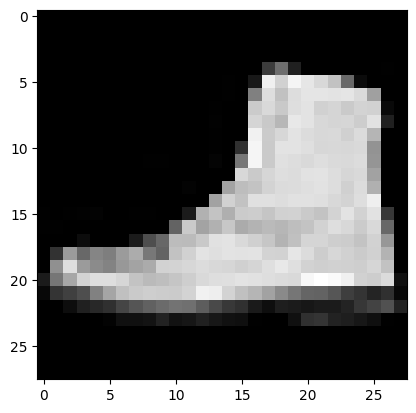

In [12]:
plt.imshow(X[0].squeeze(),cmap='gray')

# Basic Uses the LeNet Architecture
Could try a different architecture and use to convolution layers size by side before pooling for down sampling

- Worry about the weight and bias initialization in order to prevent over fitting


In [7]:
class CNN(torch.nn.Module):
    def __init__(self,num_channels,num_outputs):
        super(CNN,self).__init__()
        self.num_channels = num_channels
        self.num_outputs = num_outputs

        #Create the first convolution -> ReLu -> Pool layer (note the structure of this can be changed)
        self.conv1 = torch.nn.Conv2d(in_channels=num_channels,out_channels=6,kernel_size=5,padding=1,stride=1)
        self.relu1 = torch.nn.ReLU()
        self.maxpool1 = torch.nn.MaxPool2d(kernel_size=2,stride=2)

        #Create the Second convolution,relu, pooling layer
        self.conv2 = torch.nn.Conv2d(in_channels=6,out_channels=16,kernel_size=5)
        self.relu2 = torch.nn.ReLU()
        self.maxpool2 = torch.nn.MaxPool2d(kernel_size=2,stride=2)

        #initialize the only fully connected -> ReLu layer
        self.linear = torch.nn.Linear(in_features=256,out_features=84)
        self.relu3 = torch.nn.ReLU()

        #Initialize a second fully connected -> ReLu layer
        self.linear1 = torch.nn.Linear(in_features=84,out_features=16)
        self.relu4 = torch.nn.ReLU()

        #Final Softmax stage for classification
        self.linear2 = torch.nn.Linear(in_features=16,out_features=num_outputs)
        self.softmax = torch.nn.Softmax(dim=1)

    def forward(self,x):
        #Pass the input image into the first convolutional layer
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)

        #Pass the input image into the second convolutional layer
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)

        #Pass through the 1st fully connected layer
        x = torch.flatten(x,1)
        x = self.linear(x)
        x = self.relu3(x)

        #Pass through the 2nd fully connected layer
        x = self.linear1(x)
        x = self.relu4(x)

        #Pass the output to the softmax classifier to get the output
        x = self.linear2(x)
        x = self.softmax(x)

        return x

In [46]:
model = CNN(num_channels=1,num_outputs=10)
print(model)

CNN(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (linear): Linear(in_features=256, out_features=84, bias=True)
  (relu3): ReLU()
  (linear1): Linear(in_features=84, out_features=16, bias=True)
  (relu4): ReLU()
  (linear2): Linear(in_features=16, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)


## Create the loss and the optimizer functionality

In [40]:
# Crete the loss component
loss = torch.nn.CrossEntropyLoss()

# Create the optimizer term
optimizer = torch.optim.SGD(model.parameters(),lr=2.1)

# Create a metric for calculating the Accuracy of the network on the training data

In [41]:
def accuracy(y_hat,y):
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
        cmp = (y_hat.type(y.dtype) == y)
        return float(torch.sum(cmp))

## Create a function for training the network

In [42]:
def train_model(model,loss,optimizer,X,y):
    model.train()

    num_epochs = 300
    for epoch in range(num_epochs):
        y_hat = model(X)
        l = loss(y_hat,y)

        optimizer.zero_grad()

        l.backward()
        optimizer.step()

In [43]:
train_model(model,loss,optimizer,X,y)

In [44]:
accuracy(model(X),y)/len(y)

0.79296875